# Background frequencies

In [2]:
from katlas.core import *
import pandas as pd

In [9]:
acceptors = ['S','T','Y','ST','STY']

In [3]:
df = Data.get_ks_unique()

In [4]:
df.head()

,sub_site,num_kin,bin,sub_genes,site_seq,source_combine,acceptor,O00141_SGK1,O00238_BMPR1B,O00311_CDC7,...,Q9Y2K2_SIK3,Q9Y2U5_MAP3K2,Q9Y3S1_WNK2,Q9Y463_DYRK1B,Q9Y4K4_MAP4K5,Q9Y572_RIPK3,Q9Y5S2_CDC42BPB,Q9Y6E0_STK24,Q9Y6M4_CSNK1G3,Q9Y6R4_MAP3K4
0,A0A2R8Y4L2_S158,1,1,HNRNPA1L3 HNRNPA1P48,TDRGSGKKRGFAFVTFDDHDsVDKIVIQKYHTVNGHNCEVR,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,A0A2R8Y4L2_S22,3,2~10,HNRNPA1L3 HNRNPA1P48,SKSEsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTD,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,A0A2R8Y4L2_S6,3,2~10,HNRNPA1L3 HNRNPA1P48,_______________MSKSEsPKEPEQLRKLFIGGLsFEtT,Sugiyama,S,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,A0A2R8Y4L2_S95,65,11~100,HNRNPA1L3 HNRNPA1P48,RPHKVDGRVVEPKRAVSREDsQRPDAHLTVKKIFVGGIKED,Sugiyama,S,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,A0A2R8Y4L2_T25,3,2~10,HNRNPA1L3 HNRNPA1P48,EsPKEPEQLRKLFIGGLsFEtTDESLRSHFEQWGTLTDCVV,Sugiyama,T,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PSSMs - ks dataset

In [12]:
def get_bg_dict(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    site_pssm = get_prob(site, seq_col)
    return flatten_pssm(site_pssm, True)

In [10]:
index_names = 'ks_' + pd.Series(acceptors)

In [11]:
bg_pssms = pd.DataFrame([get_bg_dict(df,acceptor) for acceptor in acceptors],index=index_names)

In [12]:
bg_pssms

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
ks_S,0.074296,0.068105,0.075925,0.014664,0.053246,0.038517,0.051290,0.040342,0.078989,0.020269,...,0.021294,0.070330,0.059313,0.044200,0.036273,0.054880,0.077316,0.043461,0.014980,0.006449
ks_T,0.061634,0.065896,0.074266,0.016436,0.043829,0.034394,0.059656,0.040177,0.089484,0.024806,...,0.022394,0.075067,0.060558,0.045261,0.038007,0.058666,0.076644,0.035483,0.019871,0.008989
ks_Y,0.056181,0.072421,0.070666,0.015947,0.044477,0.038771,0.055889,0.045940,0.086320,0.024287,...,0.019500,0.071146,0.057892,0.042505,0.037629,0.056216,0.083181,0.023157,0.012492,0.017367
ks_ST,0.070500,0.067442,0.075428,0.015195,0.050422,0.037280,0.053799,0.040292,0.082136,0.021629,...,0.021622,0.071745,0.059685,0.044517,0.036791,0.056011,0.077115,0.041078,0.016441,0.007207
ks_STY,0.067096,0.068626,0.074296,0.015374,0.049009,0.037635,0.054296,0.041635,0.083130,0.022261,...,0.021121,0.071603,0.059262,0.044041,0.036989,0.056059,0.078548,0.036845,0.015508,0.009607


In [13]:
index_names_upper = 'ks_' + pd.Series(acceptors) + '_upper'

In [14]:
df['site_seq_upper'] = df['site_seq'].str.upper()

In [15]:
bg_pssms_upper = pd.DataFrame([get_bg_dict(df,acceptor,seq_col='site_seq_upper') for acceptor in acceptors],index=index_names_upper)

In [20]:
bg_pssms = pd.concat([bg_pssms,bg_pssms_upper])

In [21]:
bg_pssms

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
ks_S,0.074296,0.068105,0.075925,0.014664,0.053246,0.038517,0.051290,0.040342,0.078989,0.020269,...,0.021294,0.070330,0.059313,0.044200,0.036273,0.054880,0.077316,0.043461,0.014980,0.006449
ks_T,0.061634,0.065896,0.074266,0.016436,0.043829,0.034394,0.059656,0.040177,0.089484,0.024806,...,0.022394,0.075067,0.060558,0.045261,0.038007,0.058666,0.076644,0.035483,0.019871,0.008989
ks_Y,0.056181,0.072421,0.070666,0.015947,0.044477,0.038771,0.055889,0.045940,0.086320,0.024287,...,0.019500,0.071146,0.057892,0.042505,0.037629,0.056216,0.083181,0.023157,0.012492,0.017367
ks_ST,0.070500,0.067442,0.075428,0.015195,0.050422,0.037280,0.053799,0.040292,0.082136,0.021629,...,0.021622,0.071745,0.059685,0.044517,0.036791,0.056011,0.077115,0.041078,0.016441,0.007207
ks_STY,0.067096,0.068626,0.074296,0.015374,0.049009,0.037635,0.054296,0.041635,0.083130,0.022261,...,0.021121,0.071603,0.059262,0.044041,0.036989,0.056059,0.078548,0.036845,0.015508,0.009607
ks_S_upper,0.074296,0.068105,0.075925,0.014664,0.094891,0.054028,0.051290,0.040342,0.078989,0.020269,...,0.021294,0.070330,0.059313,0.044200,0.036273,0.054880,0.077316,0.000000,0.000000,0.000000
ks_T_upper,0.061634,0.065896,0.074266,0.016436,0.072744,0.052960,0.059656,0.040177,0.089484,0.024806,...,0.022394,0.075067,0.060558,0.045261,0.038007,0.058666,0.076644,0.000000,0.000000,0.000000
ks_Y_upper,0.056181,0.072421,0.070666,0.015947,0.067008,0.050475,0.055889,0.045940,0.086320,0.024287,...,0.019500,0.071146,0.057892,0.042505,0.037629,0.056216,0.083181,0.000000,0.000000,0.000000
ks_ST_upper,0.070500,0.067442,0.075428,0.015195,0.088250,0.053708,0.053799,0.040292,0.082136,0.021629,...,0.021622,0.071745,0.059685,0.044517,0.036791,0.056011,0.077115,0.000000,0.000000,0.000000
ks_STY_upper,0.067096,0.068626,0.074296,0.015374,0.083200,0.052939,0.054296,0.041635,0.083130,0.022261,...,0.021121,0.071603,0.059262,0.044041,0.036989,0.056059,0.078548,0.000000,0.000000,0.000000


In [14]:
def get_site_cnt(df, acceptor, seq_col='site_seq'):
    site = df[df.acceptor.isin(list(acceptor))].copy()
    return len(site)

In [ ]:
cnt = {name:get_site_cnt(df,acceptor) for acceptor,name in zip(acceptors,index_names)}

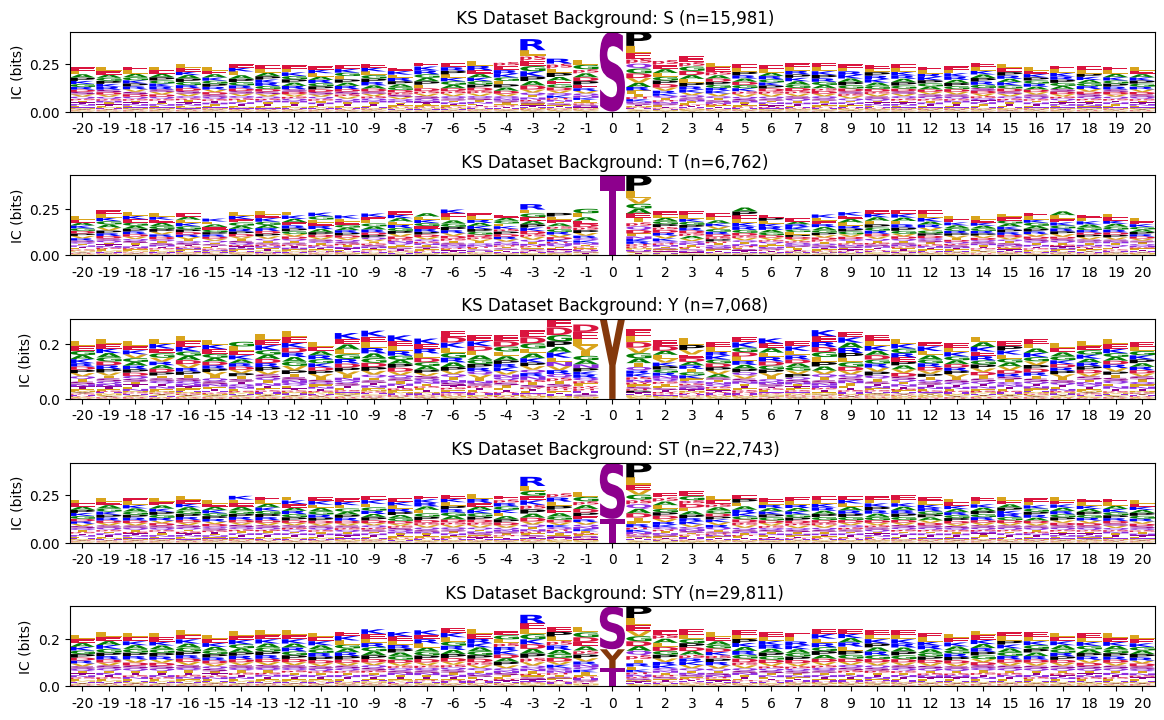

In [ ]:
plot_logos(bg_pssms,cnt,prefix='')
save_pdf('fig/background_ks.pdf')

## PSSMs - human phosphoproteome

In [5]:
human = Data.get_human_site()

In [19]:
human.acceptor

0         S
1         S
2         S
3         S
4         S
         ..
121327    S
121328    S
121329    S
121330    T
121331    T
Name: acceptor, Length: 119955, dtype: object

In [22]:
y_site = human[human.acceptor=='Y'].copy()

In [23]:
pssm = get_prob(y_site)

In [25]:
from katlas.pssm import *

In [31]:
plot_logo_heatmap

<function katlas.pssm.plot_logo_heatmap(pssm_df, title='Motif', figsize=(17, 10), include_zero=False)>

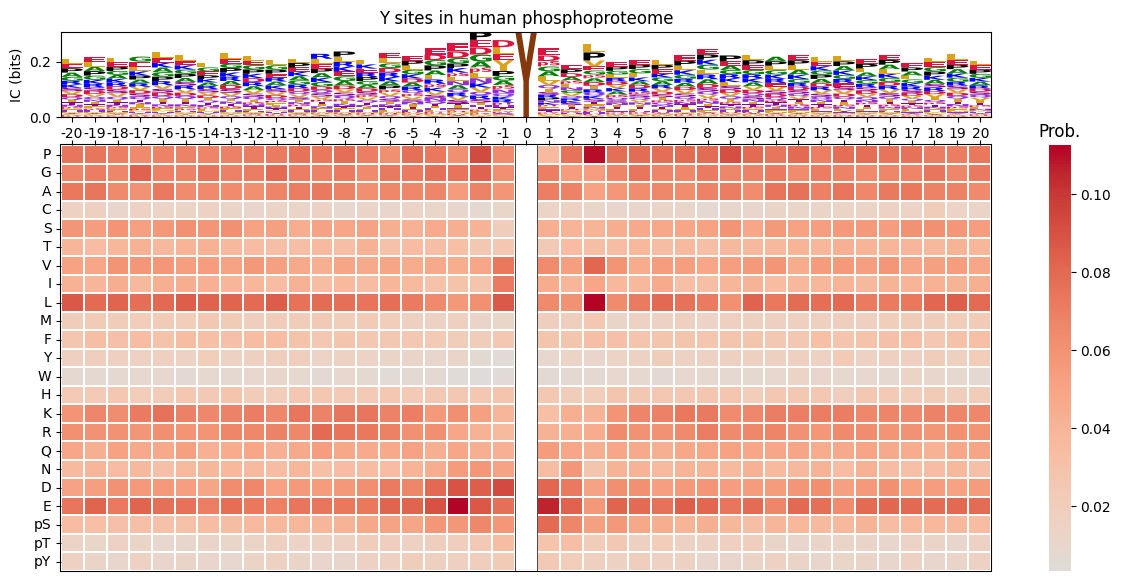

In [34]:
plot_logo_heatmap(pssm,title='Y sites in human phosphoproteome',figsize=(15,7))
save_svg('fig/human_y_site.svg')

In [6]:
human['acceptor']=human.site.str[0]

In [7]:
human.head(1)

,substrate_uniprot,substrate_genes,site,source,AM_pathogenicity,substrate_sequence,substrate_species,sub_site,substrate_phosphoseq,position,site_seq,acceptor
0,A0A024R4G9,C19orf48 MGC13170 hCG_2008493,S20,psp,NaN,MTVLEAVLEIQAITGSRLLSMVPGPARPPGSCWDPTQCTRTWLLSH...,Homo sapiens (Human),A0A024R4G9_S20,MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTRTWLLSH...,20,_MTVLEAVLEIQAITGSRLLsMVPGPARPPGSCWDPTQCTR,S


In [10]:
index_names2 = 'human_' + pd.Series(acceptors)

In [13]:
bg_pssms_human = pd.DataFrame([get_bg_dict(human,acceptor) for acceptor in acceptors],index=index_names2)

In [30]:
bg_pssms_human

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
human_S,0.083640,0.067324,0.072426,0.012983,0.068431,0.040755,0.048601,0.032621,0.080464,0.018531,...,0.022398,0.066432,0.064524,0.047369,0.033162,0.051790,0.079818,0.044602,0.013168,0.003673
human_T,0.079864,0.064356,0.074764,0.011942,0.062697,0.040927,0.052994,0.033463,0.078537,0.021811,...,0.020073,0.070087,0.062644,0.048049,0.032200,0.051813,0.078660,0.043658,0.017020,0.004851
human_Y,0.073897,0.067143,0.073103,0.016024,0.058403,0.039465,0.051781,0.041451,0.087406,0.020262,...,0.021772,0.065723,0.059600,0.049939,0.031297,0.055382,0.078106,0.034699,0.016193,0.016601
human_ST,0.082791,0.066656,0.072951,0.012749,0.067141,0.040794,0.049589,0.032810,0.080030,0.019268,...,0.021877,0.067252,0.064102,0.047521,0.032946,0.051795,0.079558,0.044391,0.014031,0.003937
human_STY,0.082206,0.066688,0.072961,0.012965,0.066566,0.040706,0.049733,0.033379,0.080515,0.019334,...,0.021870,0.067153,0.063812,0.047677,0.032840,0.052027,0.079465,0.043766,0.014171,0.004753


In [31]:
index_names2_upper = 'human_' + pd.Series(acceptors) +'_upper'

In [33]:
human['site_seq_upper'] = human['site_seq'].str.upper()

In [34]:
bg_pssms_human_upper = pd.DataFrame([get_bg_dict(human,acceptor,seq_col='site_seq_upper') for acceptor in acceptors],index=index_names2_upper)

In [35]:
bg_pssms_human_upper

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
human_S_upper,0.083640,0.067324,0.072426,0.012983,0.112772,0.053678,0.048601,0.032621,0.080464,0.018531,...,0.022398,0.066432,0.064524,0.047369,0.033162,0.051790,0.079818,0.0,0.0,0.0
human_T_upper,0.079864,0.064356,0.074764,0.011942,0.106734,0.058260,0.052994,0.033463,0.078537,0.021811,...,0.020073,0.070087,0.062644,0.048049,0.032200,0.051813,0.078660,0.0,0.0,0.0
human_Y_upper,0.073897,0.067143,0.073103,0.016024,0.093630,0.053900,0.051781,0.041451,0.087406,0.020262,...,0.021772,0.065723,0.059600,0.049939,0.031297,0.055382,0.078106,0.0,0.0,0.0
human_ST_upper,0.082791,0.066656,0.072951,0.012749,0.111414,0.054709,0.049589,0.032810,0.080030,0.019268,...,0.021877,0.067252,0.064102,0.047521,0.032946,0.051795,0.079558,0.0,0.0,0.0
human_STY_upper,0.082206,0.066688,0.072961,0.012965,0.110244,0.054656,0.049733,0.033379,0.080515,0.019334,...,0.021870,0.067153,0.063812,0.047677,0.032840,0.052027,0.079465,0.0,0.0,0.0


In [37]:
bg_pssms_human = pd.concat([bg_pssms_human,bg_pssms_human_upper])

In [38]:
bg_pssms_human

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
human_S,0.083640,0.067324,0.072426,0.012983,0.068431,0.040755,0.048601,0.032621,0.080464,0.018531,...,0.022398,0.066432,0.064524,0.047369,0.033162,0.051790,0.079818,0.044602,0.013168,0.003673
human_T,0.079864,0.064356,0.074764,0.011942,0.062697,0.040927,0.052994,0.033463,0.078537,0.021811,...,0.020073,0.070087,0.062644,0.048049,0.032200,0.051813,0.078660,0.043658,0.017020,0.004851
human_Y,0.073897,0.067143,0.073103,0.016024,0.058403,0.039465,0.051781,0.041451,0.087406,0.020262,...,0.021772,0.065723,0.059600,0.049939,0.031297,0.055382,0.078106,0.034699,0.016193,0.016601
human_ST,0.082791,0.066656,0.072951,0.012749,0.067141,0.040794,0.049589,0.032810,0.080030,0.019268,...,0.021877,0.067252,0.064102,0.047521,0.032946,0.051795,0.079558,0.044391,0.014031,0.003937
human_STY,0.082206,0.066688,0.072961,0.012965,0.066566,0.040706,0.049733,0.033379,0.080515,0.019334,...,0.021870,0.067153,0.063812,0.047677,0.032840,0.052027,0.079465,0.043766,0.014171,0.004753
human_S_upper,0.083640,0.067324,0.072426,0.012983,0.112772,0.053678,0.048601,0.032621,0.080464,0.018531,...,0.022398,0.066432,0.064524,0.047369,0.033162,0.051790,0.079818,0.000000,0.000000,0.000000
human_T_upper,0.079864,0.064356,0.074764,0.011942,0.106734,0.058260,0.052994,0.033463,0.078537,0.021811,...,0.020073,0.070087,0.062644,0.048049,0.032200,0.051813,0.078660,0.000000,0.000000,0.000000
human_Y_upper,0.073897,0.067143,0.073103,0.016024,0.093630,0.053900,0.051781,0.041451,0.087406,0.020262,...,0.021772,0.065723,0.059600,0.049939,0.031297,0.055382,0.078106,0.000000,0.000000,0.000000
human_ST_upper,0.082791,0.066656,0.072951,0.012749,0.111414,0.054709,0.049589,0.032810,0.080030,0.019268,...,0.021877,0.067252,0.064102,0.047521,0.032946,0.051795,0.079558,0.000000,0.000000,0.000000
human_STY_upper,0.082206,0.066688,0.072961,0.012965,0.110244,0.054656,0.049733,0.033379,0.080515,0.019334,...,0.021870,0.067153,0.063812,0.047677,0.032840,0.052027,0.079465,0.000000,0.000000,0.000000


In [39]:
all_pssms = pd.concat([bg_pssms,bg_pssms_human])

In [40]:
all_pssms

,-20P,-20G,-20A,-20C,-20S,-20T,-20V,-20I,-20L,-20M,...,20H,20K,20R,20Q,20N,20D,20E,20s,20t,20y
ks_S,0.074296,0.068105,0.075925,0.014664,0.053246,0.038517,0.051290,0.040342,0.078989,0.020269,...,0.021294,0.070330,0.059313,0.044200,0.036273,0.054880,0.077316,0.043461,0.014980,0.006449
ks_T,0.061634,0.065896,0.074266,0.016436,0.043829,0.034394,0.059656,0.040177,0.089484,0.024806,...,0.022394,0.075067,0.060558,0.045261,0.038007,0.058666,0.076644,0.035483,0.019871,0.008989
ks_Y,0.056181,0.072421,0.070666,0.015947,0.044477,0.038771,0.055889,0.045940,0.086320,0.024287,...,0.019500,0.071146,0.057892,0.042505,0.037629,0.056216,0.083181,0.023157,0.012492,0.017367
ks_ST,0.070500,0.067442,0.075428,0.015195,0.050422,0.037280,0.053799,0.040292,0.082136,0.021629,...,0.021622,0.071745,0.059685,0.044517,0.036791,0.056011,0.077115,0.041078,0.016441,0.007207
ks_STY,0.067096,0.068626,0.074296,0.015374,0.049009,0.037635,0.054296,0.041635,0.083130,0.022261,...,0.021121,0.071603,0.059262,0.044041,0.036989,0.056059,0.078548,0.036845,0.015508,0.009607
ks_S_upper,0.074296,0.068105,0.075925,0.014664,0.094891,0.054028,0.051290,0.040342,0.078989,0.020269,...,0.021294,0.070330,0.059313,0.044200,0.036273,0.054880,0.077316,0.000000,0.000000,0.000000
ks_T_upper,0.061634,0.065896,0.074266,0.016436,0.072744,0.052960,0.059656,0.040177,0.089484,0.024806,...,0.022394,0.075067,0.060558,0.045261,0.038007,0.058666,0.076644,0.000000,0.000000,0.000000
ks_Y_upper,0.056181,0.072421,0.070666,0.015947,0.067008,0.050475,0.055889,0.045940,0.086320,0.024287,...,0.019500,0.071146,0.057892,0.042505,0.037629,0.056216,0.083181,0.000000,0.000000,0.000000
ks_ST_upper,0.070500,0.067442,0.075428,0.015195,0.088250,0.053708,0.053799,0.040292,0.082136,0.021629,...,0.021622,0.071745,0.059685,0.044517,0.036791,0.056011,0.077115,0.000000,0.000000,0.000000
ks_STY_upper,0.067096,0.068626,0.074296,0.015374,0.083200,0.052939,0.054296,0.041635,0.083130,0.022261,...,0.021121,0.071603,0.059262,0.044041,0.036989,0.056059,0.078548,0.000000,0.000000,0.000000


In [43]:
# all_pssms.to_parquet('out/ks_background.parquet')

Accessible through Data.get_ks_background

In [ ]:
cnt_human = {name:get_site_cnt(human,acceptor) for acceptor,name in zip(acceptors,index_names2)}

In [ ]:
cnt.update(cnt_human)

In [ ]:
cnt

{'KS Dataset Background: S': 15981,
 'KS Dataset Background: T': 6762,
 'KS Dataset Background: Y': 7068,
 'KS Dataset Background: ST': 22743,
 'KS Dataset Background: STY': 29811,
 'Human Phosphoproteome Background: S': 86995,
 'Human Phosphoproteome Background: T': 25091,
 'Human Phosphoproteome Background: Y': 7869,
 'Human Phosphoproteome Background: ST': 112086,
 'Human Phosphoproteome Background: STY': 119955}

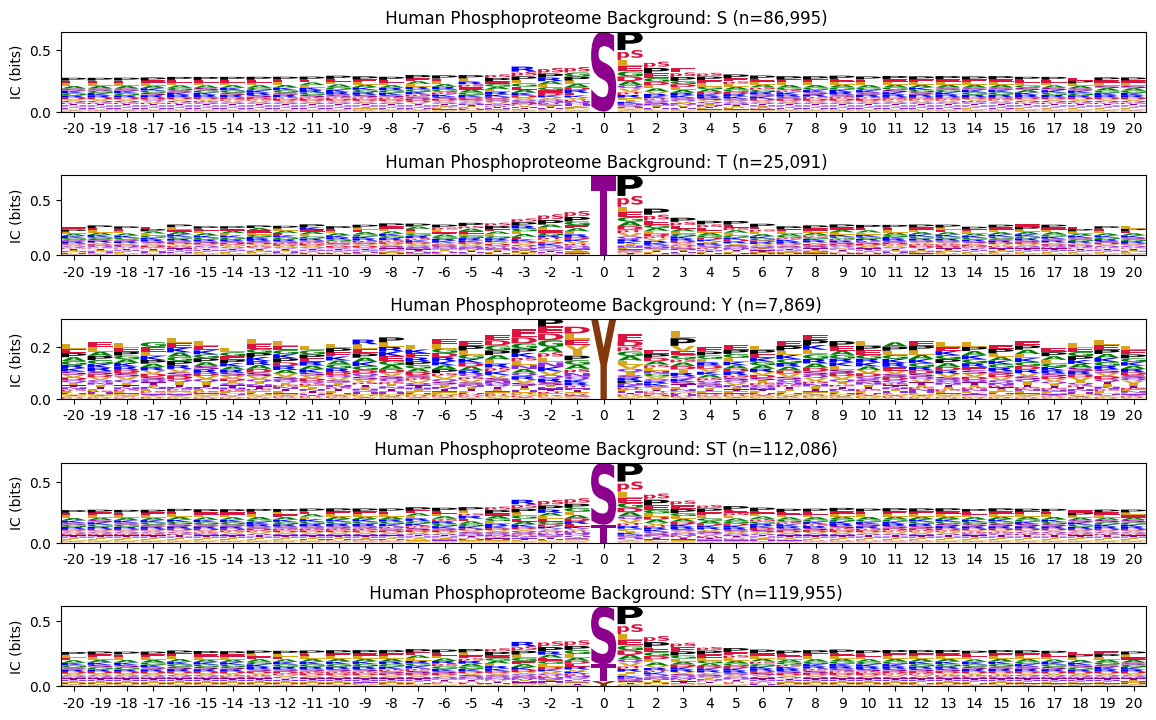

In [ ]:
plot_logos(bg_pssms_human,cnt,prefix='')
save_pdf('fig/background_human.pdf')